In [21]:
import os 
import sys 

sys.path.append('/mnt/data/robers/projects/TimeXer')
os.chdir('/mnt/data/robers/projects/TimeXer')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from utils.src.ploting import plot_data
import pickle
import torch

folder_path = '/mnt/data/robers/projects/TimeXer/playgrounds/predicted_data'

# Open batch_x, batch_y, batch_x_mark, outputs
with open(folder_path + '/batch_x.pkl', 'rb') as f:
    batch_x = pickle.load(f)

with open(folder_path + '/batch_y.pkl', 'rb') as f:
    batch_y = pickle.load(f)

with open(folder_path + '/batch_x_mark.pkl', 'rb') as f:
    batch_x_mark = pickle.load(f)

with open(folder_path + '/outputs.pkl', 'rb') as f:
    outputs = pickle.load(f)
    
print(batch_x.shape, batch_y.shape, batch_x_mark.shape, outputs.shape)

torch.Size([256, 36, 15]) torch.Size([256, 24, 1]) torch.Size([256, 36, 4]) torch.Size([256, 24, 1])


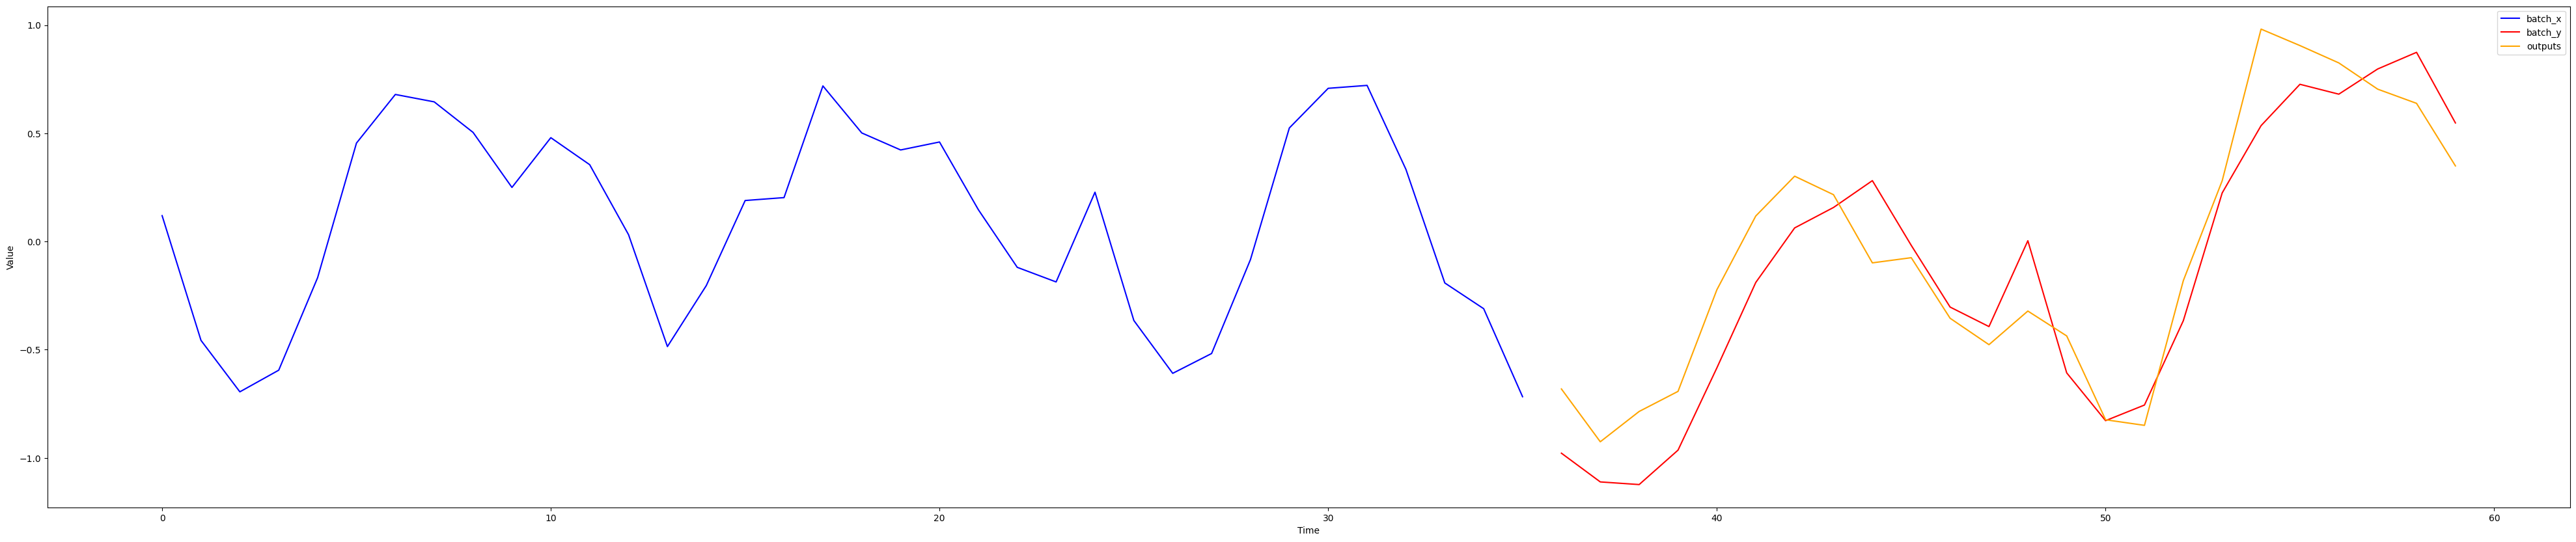

In [23]:
plot_data(batch_x, batch_y, batch_x_mark, outputs, 15)

In [24]:
data_path = '/mnt/data/robers/projects/TimeXer/dataset/real_data/combined_data.csv'
import pandas as pd

df = pd.read_csv(data_path)
print(df.shape)
df.head()

(35401, 18)


,date,FR: FrVF,FR: SoF,FR: MoNF,FR: Brückentag,FR: Do-Shopping,FR: Feiertag,FR: Ferien-Firmen,FR: Ferien,Winterzeit,year,PAY: radiation {W/m2},PAY: relative humidity{%},PAY: temperature {Celsius},PAY: rain {mm/h},gb,gct,sisyphe_v1.3_da_gb_mos
0,2021-01-01 00:00:00,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2021.0,0.0,99.7,-0.2,1.3,289.140758,286.0,NaN
1,2021-01-01 01:00:00,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2021.0,0.0,99.9,-0.3,1.3,326.047927,322.0,NaN
2,2021-01-01 02:00:00,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2021.0,0.0,99.7,-0.2,0.9,287.520370,285.0,NaN
3,2021-01-01 03:00:00,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2021.0,0.0,99.8,-0.2,0.9,260.977894,261.0,NaN
4,2021-01-01 04:00:00,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2021.0,0.0,99.8,-0.2,1.1,254.927031,258.0,NaN


In [25]:
df.shape

(35401, 18)

(7057, 24, 1) (7057, 24, 1)
(7057, 24, 1) (7057, 24, 1)
(7057,) (7057,)


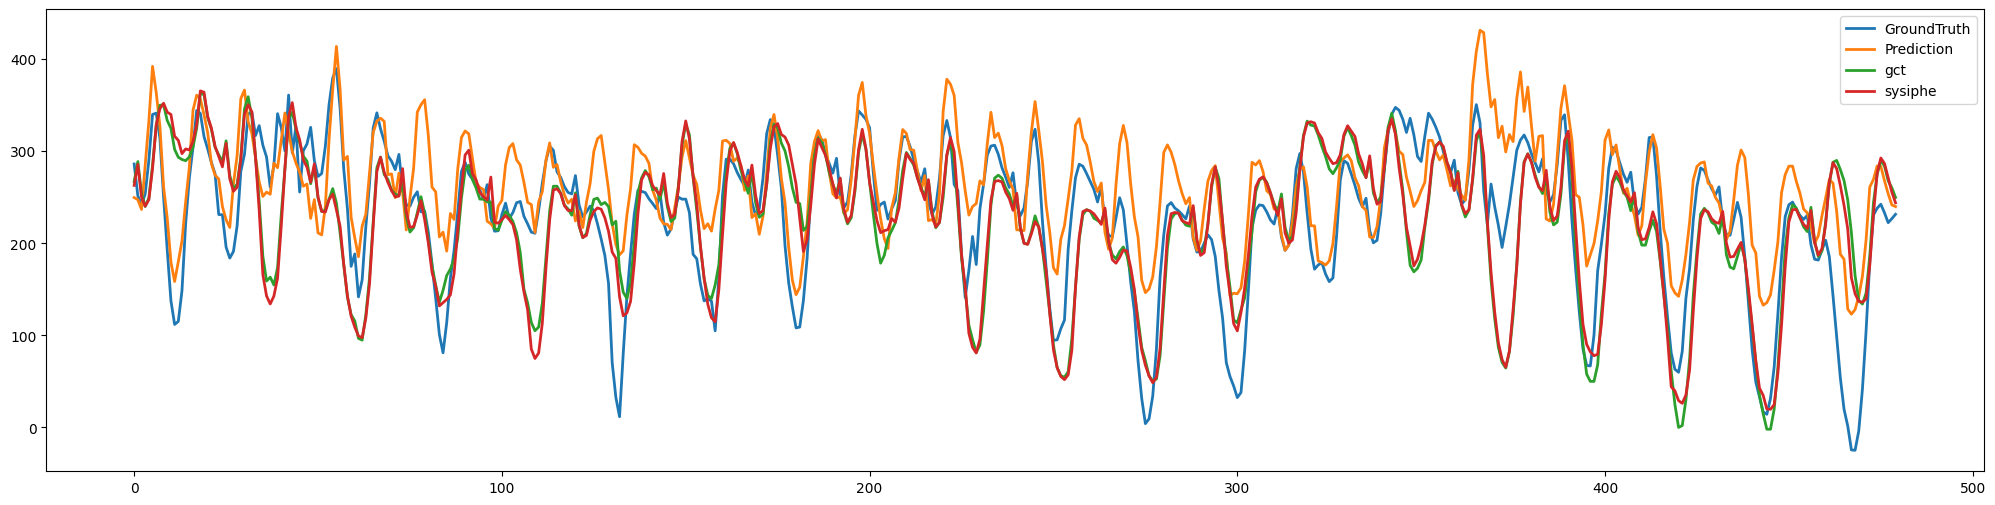

In [27]:
import numpy as np
import os

folder_path = '/mnt/data/robers/projects/TimeXer/results/long_term_forecast_NP_168_24_TimeXer_custom_ftMS_sl36_ll12_pl24_dm512_nh4_el5_dl1_df512_expand2_dc4_fc1_ebtimeF_dtTrue_test_0'
preds = os.path.join(folder_path, 'pred.npy')
true = os.path.join(folder_path, 'true.npy')

preds = np.load(preds)  
true = np.load(true)

print(preds.shape, true.shape)

len_test = preds.shape[0]
df_test = df[df.shape[0]-len_test:]

print(preds.shape, true.shape)

import matplotlib.pyplot as plt

# create a x_axis from 0 to preds.shape[0]
x_axis = np.arange(preds.shape[0])
y_values_preds = np.zeros(preds.shape[0])
y_values_true = np.zeros(preds.shape[0])

print(y_values_preds.shape, y_values_true.shape)

for idx in range(0, preds.shape[0]-preds.shape[1], preds.shape[1]):
    # print(preds[idx][:, 0].shape, preds[idx][:, 0].shape)
    y_values_preds[idx:idx+24] = preds[idx][:, 0]
    y_values_true[idx:idx+24] = true[idx][:, 0]
    
plt.figure(figsize=(25, 6))  # Width increased for better readability

len_plot = 480
start = 00
x_range = np.arange(start, start + len_plot)  # Define x-axis range

plt.plot(x_range, y_values_true[start:start+len_plot], label='GroundTruth', linewidth=2)
plt.plot(x_range, y_values_preds[start:start+len_plot], label='Prediction', linewidth=2)
plt.plot(x_range, df_test['gct'].values[start:start+len_plot], label='gct', linewidth=2)  # Ensure alignment
plt.plot(x_range, df_test['sisyphe_v1.3_da_gb_mos'].values[start:start+len_plot], label='sysiphe', linewidth=2)  # Ensure alignment


plt.legend()
plt.show()
